<h3>Investigating Spotify track meta-data for sentiment signals</h3>
    <p>The focus of this EDA is to see if there is any apparent correlation between major real-world events in a territory and Spotify generated meta-data on tracks for the charts created by Spotify for that territory.</p>
    <p>In this case we are using South Africa's top weekly charts on Spotify for a year and a small author-generated dataset of major events over the period under investigation (early 2021 to early 2022).</p>

In [136]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from pandas_profiling import ProfileReport
from IPython.display import display

In [137]:
# read in data to dataframe
charts_df = pd.read_excel('merged_data.xlsx',engine="openpyxl")

In [138]:
# Describe the data
charts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10400 entries, 0 to 10399
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week_start        10400 non-null  object 
 1   week_end          10400 non-null  object 
 2   spotify_url       10400 non-null  object 
 3   song              10400 non-null  object 
 4   artist            10400 non-null  object 
 5   streams           10400 non-null  int64  
 6   id                10400 non-null  object 
 7   acousticness      10400 non-null  float64
 8   danceability      10400 non-null  float64
 9   energy            10400 non-null  float64
 10  instrumentalness  10400 non-null  float64
 11  key               10400 non-null  int64  
 12  liveness          10400 non-null  float64
 13  loudness          10400 non-null  float64
 14  speechiness       10400 non-null  float64
 15  tempo             10400 non-null  float64
 16  time_signature    10400 non-null  int64 

In [139]:
charts_df['song'].nunique()

1165

We have 10400 records to work with. With 1165 unique songs. No null values so pretty straight forward.

In [140]:
# convert dates to datetime objects
charts_df['week_start']=pd.to_datetime(charts_df['week_start'])
charts_df['week_end']=pd.to_datetime(charts_df['week_end'])

<AxesSubplot:>

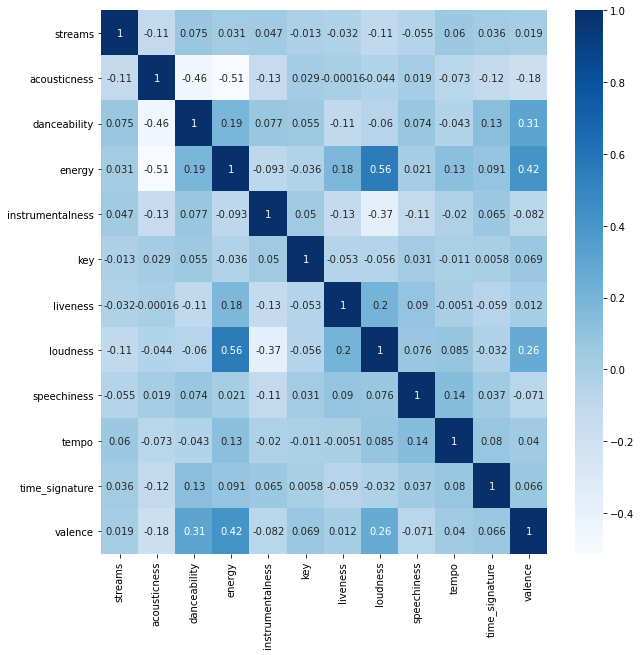

In [141]:
# Investigate possible correlations in the meta-data for the tracks
plt.figure(figsize=(10,10))
sns.heatmap(charts_df.corr(),cbar=True,annot=True,cmap='Blues')

<p>We can see noteworthy correlations between valence and energy, danceability and loudness which is a useful insight because it tells us that this attribute may be the one for us to focus on.
What is valence?</p>
<p>The Spotify web api documents (https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) say this:</p>
<p><it>"A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."</it></p>

In [173]:
# Does valence affect the number of streams, for example?
valence_streams = charts_df[['week_start','song','artist','valence','streams']]\
.sort_values('streams',ascending=False).drop_duplicates(subset='song')
valence_stream_fig = px.scatter(data_frame=charts_df, x="valence",y="streams",
                                
                               
                                width=550,
                                height= 350
                               )
valence_stream_fig.update_layout(title='Valence and Stream Volume',title_x = 0.5)


In [174]:
display(valence_streams.head(10))

,week_start,song,artist,valence,streams
9021,2021-10-15,Easy On Me,Adele,0.130,429149
8093,2021-09-03,Fair Trade (with Travis Scott),Drake,0.292,392465
8116,2021-09-03,Girls Want Girls (with Lil Baby),Drake,0.381,388818
8139,2021-09-03,Champagne Poetry,Drake,0.496,339963
8152,2021-09-03,Way 2 Sexy (with Future & Young Thug),Drake,0.331,291545
8175,2021-09-03,Love All (with JAY-Z),Drake,0.155,289365
9317,2021-10-29,Ngixolele,"Busta 929, Boohle",0.665,288009
8184,2021-09-03,Papi’s Home,Drake,0.588,280674
8601,2021-09-17,Abalele,"Kabza De Small, DJ Maphorisa, Ami Faku",0.590,269570
8191,2021-09-03,In The Bible (with Lil Durk & Giveon),Drake,0.147,268731


In [175]:
# Let's view the valence distribution now
hist_fig = px.histogram(data_frame=charts_df,x='valence', width=550,height=350,
            )
hist_fig.update_layout(title="Distribution of valence in tracks", title_x=0.5)
#sns.histplot(charts_df.valence,bins=50)

<p>This aproximates a normal distribution of data, but it is interesting that there is a little bump to the left of tracks with a valence of around 0.1-0.2 showing a slight skew. That may be worth looking at more closely.</p> 
<p>This is also kind of interesting as if you look at the scatter plot as it would appear there is both a positive correlation between tacks with pretty low valence (ie. down-beat) and stream volume as well as a correllation between higher valence and stream volume</p>

<h4>Let's chart valence now against key events in SA</h4>

In [176]:
# read the key event data into a dataframe
key_dates = pd.read_excel('key_dates.xlsx',engine="openpyxl")

In [177]:
display(key_dates)

,event,start_date,end-date
0,July Riots,2021-07-09,2021-07-18
1,Omicron classified,2021-11-24,NaT
2,Covid Wave 3 rages,2021-07-09,NaT
3,Easing of Covid lockdown,2021-09-13,2021-10-01
4,SA enters 4th wave,2021-12-01,2022-01-31
5,Covid lockdown eases,2021-03-01,NaT
6,Vaccinations start,2021-02-17,NaT
7,Delta - Wave 3,2021-06-28,NaT
8,Local elections,2021-11-01,NaT
9,Spring Equinox,2021-09-22,NaT


In [178]:
# Get the lowest valence tracks - 5th percentile 
low_valence_df= charts_df[charts_df['valence'].between(0.0362,0.12, inclusive=True)]
print (low_valence_df['song'].nunique())# Get number of unique songs in the cohort
#print (low_valence_df.groupby('song').max('streams'))
top_50_low = low_valence_df[['week_start','song','artist','valence','streams']].sort_values('streams',ascending=False).drop_duplicates('song').head(50)
#display (top_50_low)

67


 There are 67  unique songs with the valence score of between 0.0362 and 0.12

In [179]:
px.bar(data_frame=top_50_low, x=top_50_low.streams, y=top_50_low.song, orientation="h",
      title="Most streamed low-valence songs in South Africa over a year")

In [180]:
def render_radar(df, name):
    print(name[0])
    query_df = df.loc[df["song"] == f"{name}"][['danceability', 'energy', 'valence', 'liveness']]
    print(query_df.iloc[0].to_list())
    fig = px.line_polar(df, r=query_df.iloc[0].to_list(), theta=['danceability', 'energy', 'valence', 'liveness'],
                        line_close=True,
                       title = f"Characteristics of {name}",
                       width=450,height=450)
    fig.update_traces(fill='toself')
    return fig


In [181]:
render_radar(charts_df,'N 2 Deep', )

N
[0.507, 0.429, 0.0744, 0.109]


In [182]:
# Get highest valence - 95th percentile
high_valence_df= charts_df[charts_df['valence'].between(0.862,0.931, inclusive=True)]
print (high_valence_df['song'].nunique())# Get number of unique songs in the cohort
#print (low_valence_df.groupby('song').max('streams'))
top_50_high = high_valence_df[['week_start','song','artist','valence','streams']].sort_values('streams',ascending=False).drop_duplicates('song').head(50)
#display (top_50_low)

36


There are 36 tracks in the 95th percentile that are high valence

In [183]:
px.bar(data_frame=top_50_high, x=top_50_high.streams, y=top_50_high.song, orientation="h",
      title="Most streamed low-valence songs in South Africa over a year")

In [184]:
render_radar(charts_df,'INDUSTRY BABY (feat. Jack Harlow)', )

I
[0.736, 0.704, 0.894, 0.0501]


<p> This is pretty interesting.There is a larger number of tracks in the low-valence cohort and the low-valence 5th percentile has a far larger number of streams than songs in the high-valence cohort in the 95th percentile of valence.</p>
<p> This suggests that either South Africans have a tendency to more low-valence, downbeat tracks in general or that valence is reflecting a really downbeat mood in a nation in a pretty epically shitty year </p>.

In [185]:
# Sense checking this outcome
sense_check = charts_df.loc[charts_df['song']=="Sacrifice"]
#print (sense_check['streams'].max())
#print (sense_check.head())

In [187]:
low_fig = px.scatter(data_frame=low_valence_df,x=low_valence_df.week_start, 
              y='streams', color="valence" ,
              #line_shape="spline",
              #title="South Africa Top Charts on Spotify: Playlist Valence Mean by Week",
             labels={'valence': "valence for track",'week_start': 'Week of Playlist','song':'Song name: ' },
                    title="How down-beat low-valence tracked were streamed in SA over a year")


low_fig.show()

In [188]:
# calculate the valence mean for each weekly chart
valence_means= charts_df.groupby(['week_start','week_end']).mean('valence')

In [189]:
valence_means.reset_index(inplace=True) # get the dates into columns again

In [190]:
key_dates.head()

,event,start_date,end-date
0,July Riots,2021-07-09,2021-07-18
1,Omicron classified,2021-11-24,NaT
2,Covid Wave 3 rages,2021-07-09,NaT
3,Easing of Covid lockdown,2021-09-13,2021-10-01
4,SA enters 4th wave,2021-12-01,2022-01-31


In [191]:
fig = px.line(data_frame=valence_means,x=valence_means.week_start, 
              y='valence', 
              line_shape="spline",
              title="South Africa Top Charts on Spotify: Playlist Valence Mean by Week",
             labels={'valence': "Average valence per week's playlist",'week_start': 'Week of Playlist'})
annotation_positions = [random.uniform(0.45,0.52) for x in range(0, len(key_dates['event']))]
#print (annotation_positions)
for event,start in zip(key_dates['event'].to_list(),
                                key_dates['start_date'].to_list()):
    position = random.choice(annotation_positions)
    annotation_positions.remove(position)
    fig.add_annotation(x=start, y=position,
            text= event,
            showarrow=True,
            arrowhead=1)
    fig.add_vline(x=start, 
                  line_width=1,
                  line_dash="dash", 
                  line_color="green",
                  
                 
                 )

fig.show()

<p>While the mean valence per playlist per week moves through a relatively small range the pattern has of change has in interesting apparent correlation with major news events in the country. Enormously negative events like big moments in the Covid-19 pandemic or the July riots appear to co-incide with strong changes in the pattern, as if the Spotify listening public turns to tracks whose valence might mirror the public mood.</p>